In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
ob = pd.read_csv('Excel_Files/Complete_Data/OB_Data.csv')
ob.head()

,OB Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,Dispersed_Date
0,OB.1,5.0,2.0,0.0,0.0,0.0,0.0,22877.0,0.0,1939-09-07,1939-09-10
1,OB.2,5.0,2.0,0.0,0.0,0.0,0.0,22967.0,0.0,1939-09-09,1939-09-14
2,OB.3,7.0,4.0,0.0,0.0,0.0,0.0,21293.0,0.0,1939-09-11,1939-09-16
3,OB.4,12.0,2.0,0.0,0.0,0.0,0.0,77587.0,0.0,1939-09-13,1939-09-16
4,OB.5,20.0,3.0,0.0,0.0,0.0,0.0,98187.0,0.0,1939-09-16,1939-09-19


In [37]:
#Calculate Sink Rates
def Divide(a,b):
    if b == 0:
        return np.nan
    return a / b
ob['Overall Sink Rate'] = ob.apply(lambda row: Divide(row['Number of Ships Sunk'], row['Number of Ships'], ), axis=1)
ob['Escort Sink Rate'] = ob.apply(lambda row: Divide(row['Number of Escorts Sunk'], row['Number of Escort Ships']), axis=1)
ob['Straggler Sink Rate'] = ob.apply(lambda row: Divide(row['Number of Stragglers Sunk'], row['Number of Stragglers'],), axis=1)
ob['Depart_Date'] = pd.to_datetime(ob['Depart_Date'], errors='coerce')
ob = ob.fillna(0)
ob.head()

,OB Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,Dispersed_Date,Overall Sink Rate,Escort Sink Rate,Straggler Sink Rate,Moving_Avg_Ships
0,OB.1,5.0,2.0,0.0,0.0,0.0,0.0,22877.0,0.0,1939-09-07,1939-09-07,0.0,0.0,0.0,0.0
1,OB.2,5.0,2.0,0.0,0.0,0.0,0.0,22967.0,0.0,1939-09-09,1939-09-09,0.0,0.0,0.0,0.0
2,OB.3,7.0,4.0,0.0,0.0,0.0,0.0,21293.0,0.0,1939-09-11,1939-09-11,0.0,0.0,0.0,0.0
3,OB.4,12.0,2.0,0.0,0.0,0.0,0.0,77587.0,0.0,1939-09-13,1939-09-13,0.0,0.0,0.0,0.0
4,OB.5,20.0,3.0,0.0,0.0,0.0,0.0,98187.0,0.0,1939-09-16,1939-09-16,0.0,0.0,0.0,9.8


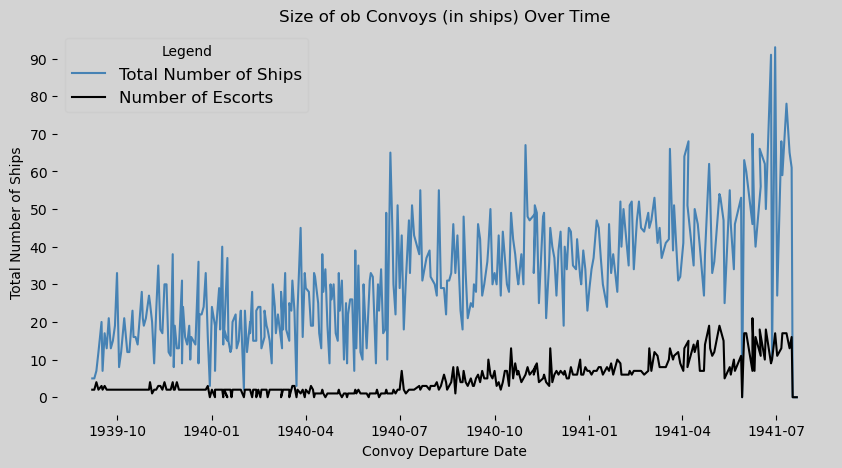

In [39]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(ob['Depart_Date'], ob['Number of Ships'], color='steelblue', label='Total Number of Ships')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Total Number of Ships')
ax.set_facecolor('lightgrey')
ax.set_yticks(np.arange(0, 110, 10))
plt.title('Size of ob Convoys (in ships) Over Time')
#WW2_Start = pd.to_datetime('1939-9-01')
#plt.axvline(x=WW2_Start, color='black', linestyle='--', linewidth=1, label='Invasion of Poland')
#x = mdates.date2num(ob['Depart_Date'])
#y = ob['Number of Ships']
#z = np.polyfit(x, ob['Number of Ships'], 20)
#p = np.poly1d(z)
#plt.plot(x, p(x))
plt.plot(ob['Depart_Date'], ob['Number of Escort Ships'], color='black', label='Number of Escorts')
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()